In [1]:
import pandas as pd
from pylab import *
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("data/tips.csv")

## memory usage

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [4]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 64.0 KB


In [5]:
df.memory_usage(deep=True)

Index            80
total_bill     1952
tip            1952
sex           15058
smoker        14489
day           14702
time          15304
size           1952
dtype: int64

In [6]:
# will change col with int to save the memory (visually will be the same), good in cases when some values repeated
# too often
# df1["cand_id"] = df1["cand_id"].astype("category")

## Data info

In [7]:
print(f"cols: {df.columns.values}")
print(f"size: {df.shape[0]}")

cols: ['total_bill' 'tip' 'sex' 'smoker' 'day' 'time' 'size']
size: 244


In [8]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [9]:
df.day.describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

In [10]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

**in persentage**

In [11]:
df.day.value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [12]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [13]:
df.day.nunique()

4

## Grouping

In [14]:
df.groupby(["sex", "smoker"])[["total_bill", "tip"]].agg(["sum"])

total_bill     tip
                     sum     sum
sex    smoker                   
Female No         977.68  149.77
       Yes        593.27   96.74
Male   No        1919.75  302.00
       Yes       1337.07  183.07

In [15]:
df.groupby(["sex", "smoker"])[["total_bill", "tip"]].agg({"total_bill":"mean", "tip":"mean"})

total_bill       tip
sex    smoker                      
Female No       18.105185  2.773519
       Yes      17.977879  2.931515
Male   No       19.791237  3.113402
       Yes      22.284500  3.051167

In [16]:
df.groupby("smoker")["total_bill", "tip"].agg("mean").add_prefix("mean_")

mean_total_bill  mean_tip
smoker                           
No            19.188278  2.991854
Yes           20.756344  3.008710

In [17]:
df.groupby("day").tip.agg(["count", "min", "max", "mean"])

count   min    max      mean
day                               
Fri      19  1.00   4.73  2.734737
Sat      87  1.00  10.00  2.993103
Sun      76  1.01   6.50  3.255132
Thur     62  1.25   6.70  2.771452

In [18]:
df.groupby("day").tip.mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [19]:
df.groupby("day")["tip", "total_bill", "size"].mean()

tip  total_bill      size
day                                 
Fri   2.734737   17.151579  2.105263
Sat   2.993103   20.441379  2.517241
Sun   3.255132   21.410000  2.842105
Thur  2.771452   17.682742  2.451613

## Visualisation

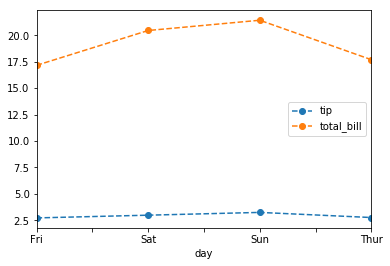

In [20]:
# ["Thur", "Fri", "Sat", "Sun"]
df.groupby("day")["tip", "total_bill"].mean().plot(linestyle='dashed', marker='o');

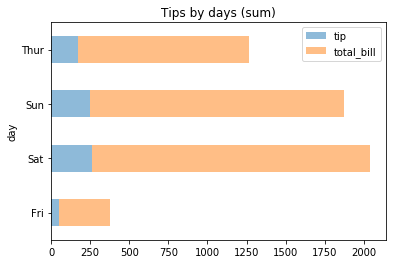

In [21]:
df.groupby("day")["tip", "total_bill"].sum().plot(kind='barh', stacked=True, alpha=0.5, title="Tips by days (sum)");

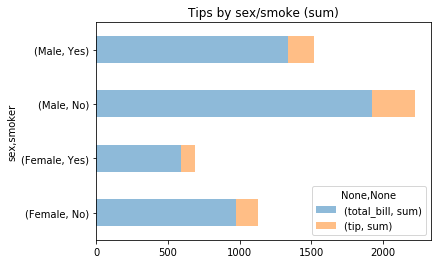

In [22]:
df.groupby(["sex", "smoker"])[["total_bill", "tip"]].agg(["sum"]).plot(
    kind="barh", stacked=True, alpha=0.5, title="Tips by sex/smoke (sum)");

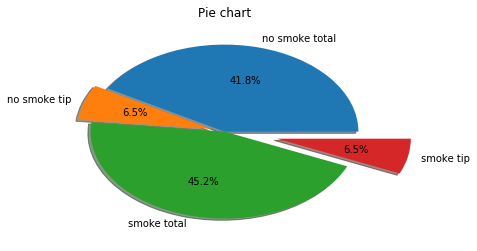

In [23]:
title("Pie chart");
pie(df.groupby("smoker")["total_bill", "tip"].agg("mean").values.flatten(),
        explode=(0, 0.1, 0, 0.4), shadow=True, autopct="%1.1f%%",
        labels=("no smoke total", "no smoke tip", "smoke total", "smoke tip"));

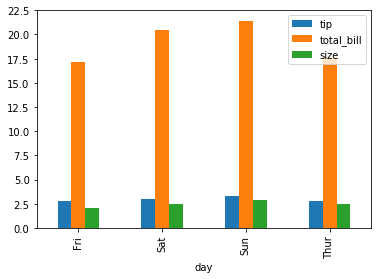

In [24]:
df.groupby("day")["tip", "total_bill", "size"].mean().plot(kind="bar");

## Sorting

In [25]:
df.tip.sort_values(ascending=False).head(10)

170    10.00
212     9.00
23      7.58
59      6.73
141     6.70
214     6.50
183     6.50
47      6.00
239     5.92
88      5.85
Name: tip, dtype: float64

In [26]:
df.sort_values("tip", ascending=False).head(10)

total_bill    tip     sex smoker   day    time  size
170       50.81  10.00    Male    Yes   Sat  Dinner     3
212       48.33   9.00    Male     No   Sat  Dinner     4
23        39.42   7.58    Male     No   Sat  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
214       28.17   6.50  Female    Yes   Sat  Dinner     3
183       23.17   6.50    Male    Yes   Sun  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
239       29.03   5.92    Male     No   Sat  Dinner     3
88        24.71   5.85    Male     No  Thur   Lunch     2

In [27]:
df.sort_values(["size", "tip"], ascending=False).head(10)

total_bill   tip     sex smoker   day    time  size
141       34.30  6.70    Male     No  Thur   Lunch     6
143       27.05  5.00  Female     No  Thur   Lunch     6
156       48.17  5.00    Male     No   Sun  Dinner     6
125       29.80  4.20  Female     No  Thur   Lunch     6
155       29.85  5.14  Female     No   Sun  Dinner     5
142       41.19  5.00    Male     No  Thur   Lunch     5
185       20.69  5.00    Male     No   Sun  Dinner     5
216       28.15  3.00    Male    Yes   Sat  Dinner     5
187       30.46  2.00    Male    Yes   Sun  Dinner     5
212       48.33  9.00    Male     No   Sat  Dinner     4

**Add new field**

In [28]:
df["total"] = df["tip"] + df["total_bill"]

### Create new Data Frame and move to *csv*

In [30]:
# new_df = pd.DataFrame({"Name": ["artem", "sasha", "masha"], "Age": [23, 22, 12]}).to_csv("lol.csv")

### Work with strings

In [32]:
df.sex = df.sex.str.upper()

### Filter

In [39]:
df[df.sex.str.contains("FE")].head()

total_bill   tip     sex smoker  day    time  size  total
0        16.99  1.01  FEMALE     No  Sun  Dinner     2  18.00
4        24.59  3.61  FEMALE     No  Sun  Dinner     4  28.20
11       35.26  5.00  FEMALE     No  Sun  Dinner     4  40.26
14       14.83  3.02  FEMALE     No  Sun  Dinner     2  17.85
16       10.33  1.67  FEMALE     No  Sun  Dinner     3  12.00

In [40]:
type(df.sex.str)

pandas.core.strings.StringMethods

In [41]:
df_with_dublicates = pd.DataFrame({"Name": ["artem", "sasha", "masha", "artem"], "Age": [23, 22, 12, 23]})
df_with_dublicates

Age   Name
0   23  artem
1   22  sasha
2   12  masha
3   23  artem

In [44]:
df_with_dublicates.duplicated()

0    False
1    False
2    False
3     True
dtype: bool

In [45]:
df_with_dublicates.loc[df_with_dublicates.duplicated()]

Age   Name
3   23  artem

In [46]:
df_with_dublicates.drop_duplicates()

Age   Name
0   23  artem
1   22  sasha
2   12  masha

## Filtering

In [54]:
tip_range = (df.tip > 2) & (df.tip < 3)
df[tip_range].head()

total_bill   tip     sex smoker  day    time  size  total
21       20.29  2.75  FEMALE     No  Sat  Dinner     2  23.04
22       15.77  2.23  FEMALE     No  Sat  Dinner     2  18.00
25       17.81  2.34    MALE     No  Sat  Dinner     4  20.15
31       18.35  2.50    MALE     No  Sat  Dinner     4  20.85
33       20.69  2.45  FEMALE     No  Sat  Dinner     4  23.14

In [70]:
# in this case is better to use df.loc as it executed as one operation
df[tip_range].sex.head()

21    FEMALE
22    FEMALE
25      MALE
31      MALE
33    FEMALE
Name: sex, dtype: object

## LOC

In [55]:
# first row
df.loc[1]

total_bill     10.34
tip             1.66
sex             MALE
smoker            No
day              Sun
time          Dinner
size               3
total             12
Name: 1, dtype: object

In [56]:
# from 2 to 5
df.loc[2:5]

total_bill   tip     sex smoker  day    time  size  total
2       21.01  3.50    MALE     No  Sun  Dinner     3  24.51
3       23.68  3.31    MALE     No  Sun  Dinner     2  26.99
4       24.59  3.61  FEMALE     No  Sun  Dinner     4  28.20
5       25.29  4.71    MALE     No  Sun  Dinner     4  30.00

In [57]:
# select rows
df.loc[[2,3,7]]

total_bill   tip   sex smoker  day    time  size  total
2       21.01  3.50  MALE     No  Sun  Dinner     3  24.51
3       23.68  3.31  MALE     No  Sun  Dinner     2  26.99
7       26.88  3.12  MALE     No  Sun  Dinner     4  30.00

In [68]:
# all rows, 'day' col
df.loc[:, "day"].head()

0    Sun
1    Sun
2    Sun
3    Sun
4    Sun
Name: day, dtype: object

In [61]:
# second row, day and sex cols
df.loc[2, ["day", "sex"]]

day     Sun
sex    MALE
Name: 2, dtype: object

In [62]:
# from 2 to 5 rows, day and sex cols
df.loc[2:5, ["day", "sex"]]

day     sex
2  Sun    MALE
3  Sun    MALE
4  Sun  FEMALE
5  Sun    MALE

In [67]:
# all rows where time contains "in", display only day col
df.loc[df["time"].str.contains("in"), "day"].head()

0    Sun
1    Sun
2    Sun
3    Sun
4    Sun
Name: day, dtype: object